# Classification - Decission Tree

In [1]:
# Packages
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from mglearn.plots import plot_2d_separator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

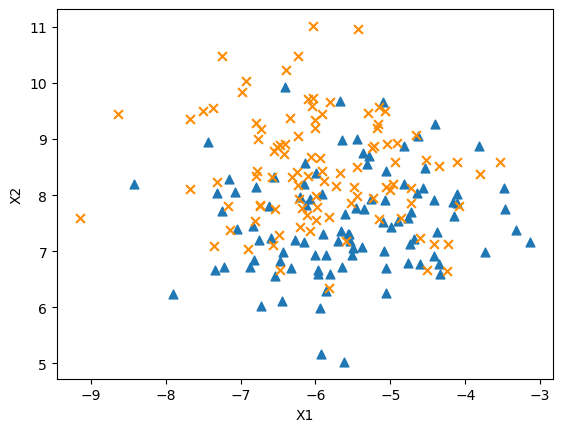

In [2]:
# Artificial Data
X, y = make_blobs(centers=2, random_state=5, n_samples=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="darkorange", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [4]:
np.unique(y_train,  return_counts=True)

(array([0, 1]), array([76, 74], dtype=int64))

In [5]:
np.unique(y_test,  return_counts=True)

(array([0, 1]), array([24, 26], dtype=int64))

In this case, a maximum depth of three is used to facilitate subsequent rendering of the tree.

In [6]:
# Decission Tree model
depth = 3
clf = DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [7]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [8]:
print('- Accuracy in  train: {}'.format(clf.score(X_train, y_train)))
print('- Accuracy in  test: {}'.format(clf.score(X_test, y_test)))

- Accuracy in  train: 0.76
- Accuracy in  test: 0.62


In [9]:
# Metrics
print("- Precision:", round(precision_score(y_test, y_test_pred),2))
print("- Recall:", round(recall_score(y_test, y_test_pred), 2))
print("- Fscore:", round(f1_score(y_test, y_test_pred),2))

- Precision: 0.62
- Recall: 0.69
- Fscore: 0.65


In [10]:
confusion_matrix(y_test, y_test_pred)

array([[13, 11],
       [ 8, 18]], dtype=int64)

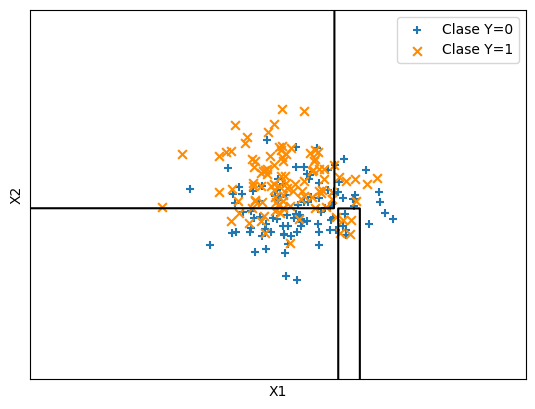

In [11]:
# Model plot
plt.scatter(X[y == 0,0], X[y == 0,1], s=40, label="Clase Y=0", marker="+")
plt.scatter(X[y == 1,0], X[y == 1,1], s=40, label="Clase Y=1", c="darkorange", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plot_2d_separator(clf, X)
plt.show()

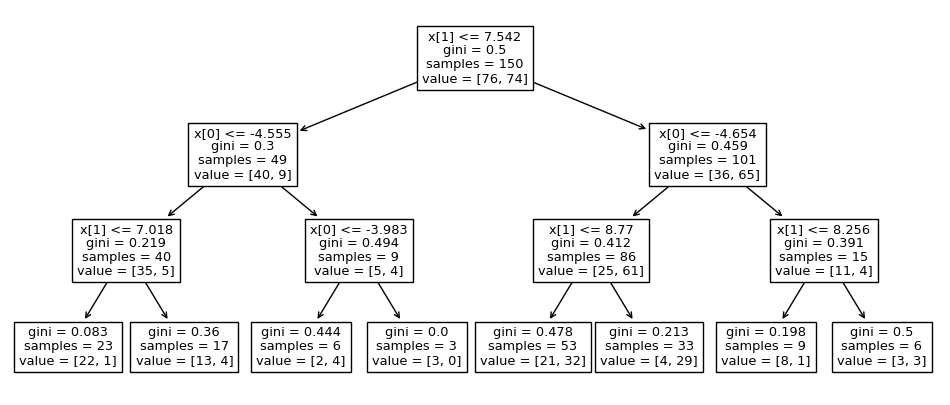

In [12]:
# Plot Tree
fig, ax = plt.subplots(figsize=(12, 5))
_ = tree.plot_tree(clf, )
plt.show()